<a href="https://colab.research.google.com/github/hkokin/ekpa/blob/main/Practice_babis_kokkinopoulos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
pip install pandas numpy scikit-learn


In [46]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Φόρτωση των δεδομένων από ένα αρχείο CSV
data = pd.read_csv('https://raw.githubusercontent.com/hkokin/ekpa/main/DarkNet.csv')

# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values using forward fill
data.fillna(method='ffill', inplace=True)

# Select only numerical features for scaling
numerical_features = data.select_dtypes(include=['number']).columns
data_numerical = data[numerical_features]

# Now apply MinMaxScaler to the numerical data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_numerical)

<ipython-input-46-4a47080e5a29>:9: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://raw.githubusercontent.com/hkokin/ekpa/main/DarkNet.csv')
<ipython-input-46-4a47080e5a29>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [47]:
from sklearn.ensemble import IsolationForest

# Δημιουργία του μοντέλου
model = IsolationForest(contamination=0.01)

# Εκπαίδευση του μοντέλου
model.fit(data_scaled)

IsolationForest(contamination=0.01)

In [48]:
# Υπολογισμός των βαθμολογιών ανωμαλίας
scores = model.decision_function(data_scaled)

# Ορισμός κατωφλίου και ταξινόμηση
threshold = -0.1
data['label'] = (scores < threshold).astype(int)

In [49]:
print(data.head(10))

          Src_IP  Src_Port          Dst_IP  Dst_Port  Protocol  Flow_Duration  \
0  10.152.152.11     57158   216.58.220.99       443         6            229   
1  10.152.152.11     57159   216.58.220.99       443         6            407   
2  10.152.152.11     57160   216.58.220.99       443         6            431   
3  10.152.152.11     49134  74.125.136.120       443         6            359   
4  10.152.152.11     34697  173.194.65.127     19305         6       10778451   
5  10.152.152.11     54570  173.194.65.127       443         6         421362   
6  173.194.33.97       443   10.152.152.11     56254         6      119682119   
7  10.152.152.11     57361  216.58.216.142       443         6      116996934   
8  74.125.28.189       443   10.152.152.11     44097         6      100279453   
9  10.152.152.11     34702  173.194.65.127     19305         6      119962833   

   Total_Fwd_Packet  Total_Bwd_packets  Total_Length_of_Fwd_Packet  \
0                 1                  1

In [50]:
data.to_csv('results.csv', index=False)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


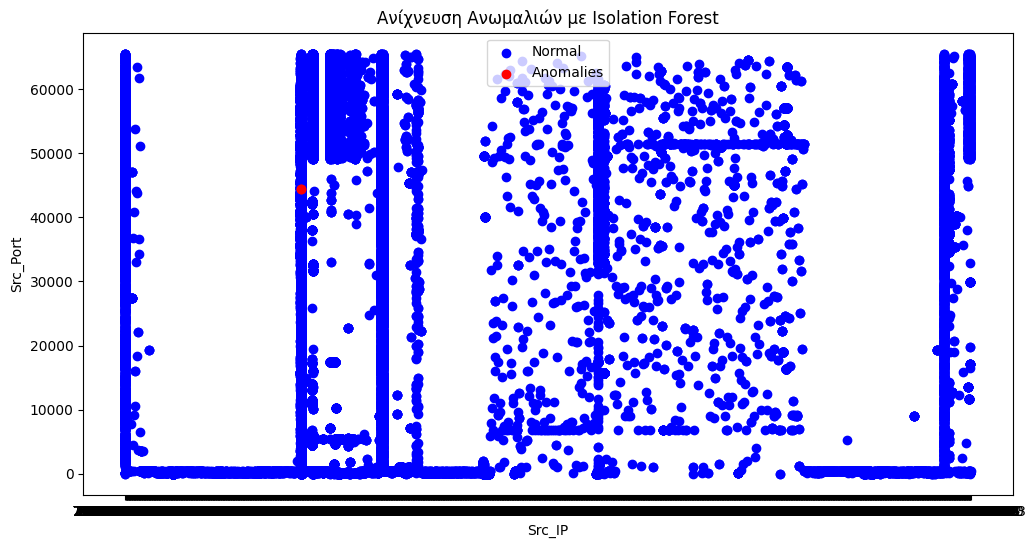

In [51]:
# Οπτικοποίηση των αποτελεσμάτων
# Ας υποθέσουμε ότι έχουμε δύο χαρακτηριστικά (feature1, feature2) για απλότητα
plt.figure(figsize=(12, 6))

# Όλα τα σημεία δεδομένων
plt.scatter(data['Src_IP'], data['Src_Port'], color='blue', label='Normal')

# Ανώμαλα σημεία
outliers = data[data['label'] == 1]
plt.scatter(outliers['Src_IP'], outliers['Src_Port'], color='red', label='Anomalies')

plt.xlabel('Src_IP')
plt.ylabel('Src_Port')
plt.title('Ανίχνευση Ανωμαλιών με Isolation Forest')
plt.legend()
plt.show()